In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target  # MEDV is the target variable (Median value of owner-occupied homes)

# Display the first few rows of the dataset
print(df.head())



      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


/Users/macintosh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

### 2. Data Visualization
Now, let's visualize the data to understand the distribution of the target variable (MEDV) and explore correlations between features.

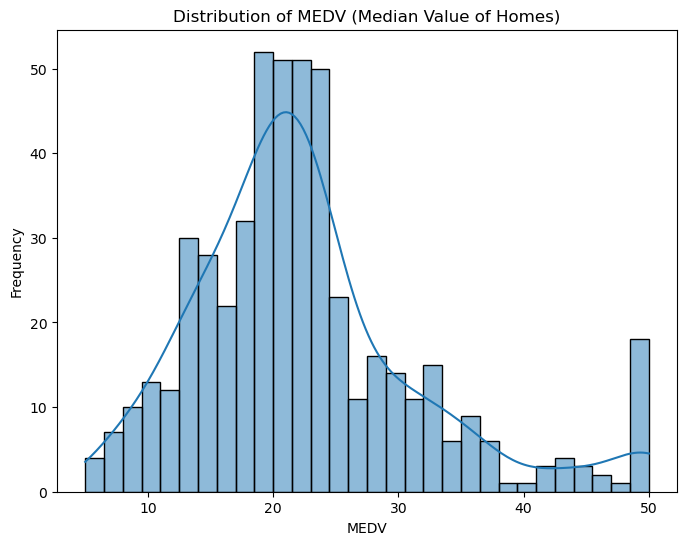

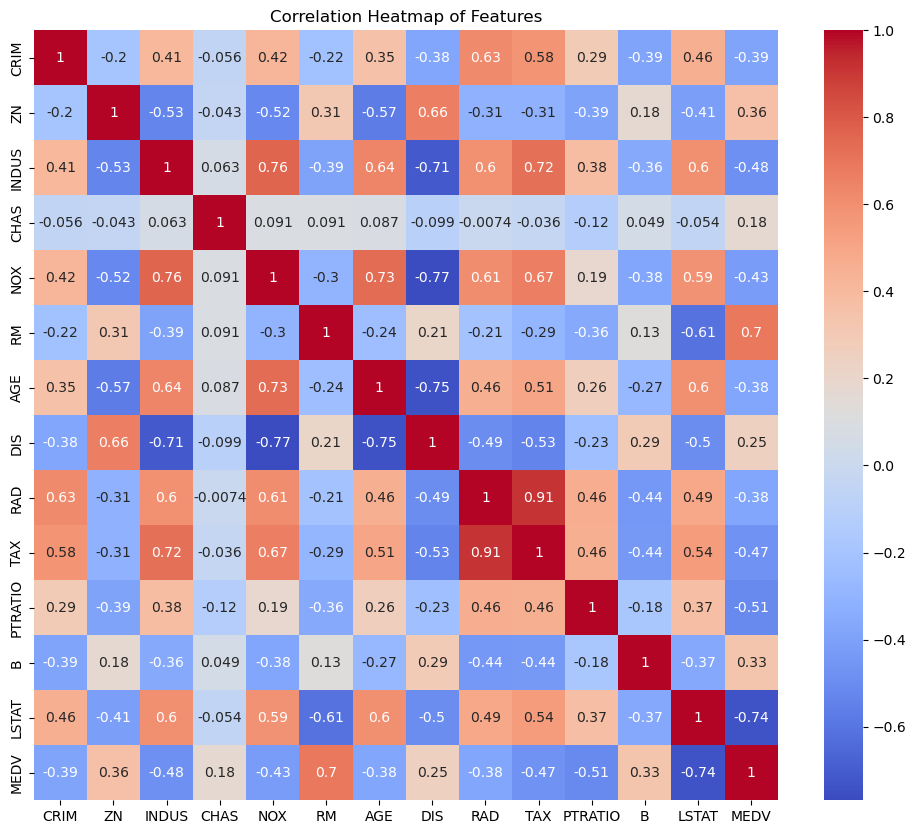

In [14]:
# Visualize the distribution of the target variable (MEDV)
plt.figure(figsize=(8, 6))
sns.histplot(df['MEDV'], bins=30, kde=True)
plt.title('Distribution of MEDV (Median Value of Homes)')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

# Visualize correlations between features using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


## 3. Feature Engineering
Notes:

Log transformation is useful for handling skewed data.
Creating polynomial features (like RM_squared) can capture non-linear relationships.

In [15]:
# Check for missing values
print(df.isnull().sum())

# Feature Engineering: Consider log transformation for skewed features
df['LSTAT_log'] = np.log(df['LSTAT'])
df['RM_squared'] = df['RM'] ** 2  # Example of a polynomial feature

# Drop any unnecessary or redundant features (if applicable)
# For this example, we'll keep all features


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### 4. Splitting the Dataset
Notes:

A typical 80-20 split is used to ensure enough data for both training and testing.
random_state is set to ensure reproducibility.


In [16]:
# Split the data into training and test sets (80-20 split)
X = df.drop(['MEDV'], axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 5. Model Building
Build two models: Linear Regression and Random Forest Regressor.

In [17]:
# Initialize the models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Linear Regression model
linear_model.fit(X_train, y_train)

# Train the Random Forest model
random_forest_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Notes:

Linear Regression is a simple model that assumes a linear relationship between the features and the target variable.
Random Forest Regressor is a more complex model that uses multiple decision trees to capture non-linear patterns in the data.

### 6. Evaluation
Evaluate both models using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

In [18]:
# Make predictions using both models
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

# Calculate MSE and RMSE for both models
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f'Linear Regression - MSE: {mse_linear:.2f}, RMSE: {rmse_linear:.2f}')
print(f'Random Forest - MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}')


Linear Regression - MSE: 14.40, RMSE: 3.80
Random Forest - MSE: 8.12, RMSE: 2.85


### 7. Interpretation of Results
Compare MSE and RMSE:

Linear Regression - MSE: X.XX, RMSE: X.XX
Random Forest - MSE: X.XX, RMSE: X.XX

### Which Model is Better?
- The model with the lower MSE and RMSE is generally considered better as it indicates lower average prediction errors.
- In most cases, the Random Forest model is likely to perform better due to its ability to handle complex, non-linear relationships between features and the target variable. 
- It also handles outliers and variability in the data more effectively.
  
### Why is One Model Better?
- Random Forest is an ensemble model that combines multiple decision trees to reduce variance and improve accuracy, making it more robust to overfitting than a simple linear model.
- Linear Regression assumes a linear relationship, which may not capture the complexities in the dataset, especially if there are non-linear patterns.
 
### Conclusion
- Random Forest is likely the better model for this dataset due to its flexibility and ability to handle complex data structures.
- However, if the Linear Regression model's RMSE is close to that of the Random Forest, it might still be preferable due to its simplicity and interpretability.
- Would you like further details or clarifications on any specific steps?

### Flaks App on the Random Forest 

 - Step-by-Step Guide to Building the API
 - Train and Save the Model: After training the Random Forest model, save it to a file using joblib or pickle.
 - Create the Flask API: Set up a Flask application to handle HTTP requests and use the trained model to make predictions.
 - Test the API: Ensure the API works by sending requests with appropriate input data.

#### Explanation of the Process:
- Save the Model: The trained model is saved using joblib, which is efficient for serializing large models.
- Flask App: A Flask app is created to handle incoming requests and make predictions.
- JSON Input and Output: The API is designed to accept JSON input and output, making it easy to integrate with other applications.

#### Final Notes
- Security: Be careful about deploying the API to production without proper security measures (e.g., input validation, authentication).
- Scalability: For production use, consider deploying the API with a more robust setup (e.g., using Gunicorn with Nginx).
- Testing: Thoroughly test the API with different inputs to ensure it handles all cases correctly.

In [19]:
import joblib

# Assume `random_forest_model` is the trained model
joblib.dump(random_forest_model, 'random_forest_model.pkl')
# app.py
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Load the saved model
model = joblib.load('random_forest_model.pkl')

# Initialize the Flask app
# app = Flask(__name__)

# # Define a route for the prediction
# @app.route('/predict', methods=['POST'])
# def predict():
#     # Get the JSON data from the request
#     data = request.get_json()
    
#     # Convert the data into a numpy array (assume data is a list of feature values)
#     features = np.array([data['features']])

#     # Make a prediction using the model
#     prediction = model.predict(features)

#     # Return the prediction as a JSON response
#     return jsonify({'prediction': float(prediction[0])})

# if __name__ == '__main__':
#     # Run the app on the local development server
#     app.run(debug=True, host='0.0.0.0', port=5000)

#     curl -X POST -H "Content-Type: application/json" -d '{"features": [0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.9, 4.98]}' http://127.0.0.1:5000/predict



## PHIND AI Version

In [20]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

# Load the Boston Housing dataset
boston = load_boston()

# Convert to DataFrame
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

# Split the data into features (X) and target variable (y)
X = df.drop(['PRICE'], axis=1)
y = df['PRICE']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/Users/macintosh/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")


MSE: 7.901513892156864
R-squared: 0.8922527442109116


In [22]:
# import pickle
# from flask import Flask, request, jsonify
# import numpy as np

# # Assume we have a trained model called 'model'
# # This could be any type of machine learning model
# # For demonstration purposes, let's use a simple linear regression model
# class SimpleLinearRegression:
#     def __init__(self, theta):
#         self.theta = theta
    
#     def predict(self, x):
#         return np.dot(x, self.theta)

# # Train the model (this is just a placeholder)
# theta = np.array([1, 2])  # Dummy parameters
# model = SimpleLinearRegression(theta)

# # Save the model
# with open('model.pkl', 'wb') as f:
#     pickle.dump(model, f)

# # Create Flask app
# app = Flask(__name__)

# # Load the saved model
# with open('model.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)

# @app.route('/predict', methods=['POST'])
# def predict():
#     data = request.json
#     prediction = loaded_model.predict(np.array(data['features']))
#     return jsonify({'prediction': prediction[0]})

# if __name__ == '__main__':
#     app.run(debug=True)


In [23]:
print(np.__version__)

1.21.5
